# Segmentation - ABC Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supplier-scm/supplier_data.csv
/kaggle/input/online-retail-ii-uci/online_retail_II.csv


In [2]:
pip install inventorize3

  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15604 sha256=f8d31dba2ea159254a088d74576ee52f08ca22d0c28f2088438a4def39e47c65
  Stored in directory: /root/.cache/pip/wheels/10/81/ca/1b8df04e233213dc92a89f64f56f04eeba6e6f1f12ba264de3
Successfully built inventorize3
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import inventorize3 as inv

In [4]:
retail=pd.read_csv('../input/online-retail-ii-uci/online_retail_II.csv')

In [5]:
retail=retail.drop_duplicates()

In [6]:
retail=retail.dropna()
retail_clean=retail.copy()
retail_clean.to_csv('retail_clean.csv',index=False)

In [7]:
# Removing negative values
retail_clean=retail_clean[retail_clean.Quantity>0]

In [8]:
# Make a calulated revenue column
retail_clean['Revenue']=retail_clean['Quantity']*retail_clean['Price']

In [9]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [10]:
group_df= retail_clean.groupby('Description').agg(total_sale=('Quantity',np.sum),
                                                 total_rev=('Revenue',np.sum)).reset_index()

In [11]:
group_df.to_csv('ABC_data.csv',index=False)

## ABC analysis

In [12]:
a = inv.ABC(group_df[['Description','total_sale']])

In [13]:
a

,Description,total_sale,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,0.041229,A
...,...,...,...,...,...
3451,PINK STRIPES SHOULDER BAG,1,9.497844e-08,1.000000,C
4370,SILVER AND BLACK ORBIT NECKLACE,1,9.497844e-08,1.000000,C
479,BLACK DIAMOND CLUSTER EARRINGS,1,9.497844e-08,1.000000,C
4271,SET/2 SPOTTY + ROSE TEA TOWELS,1,9.497844e-08,1.000000,C


In [14]:
a.Category.value_counts()

C    2881
B    1245
A    1157
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

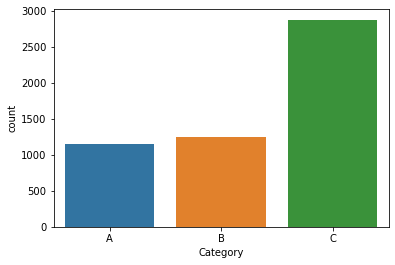

In [15]:
sns.countplot('Category',data=a)

<AxesSubplot:xlabel='Category', ylabel='total_sale'>

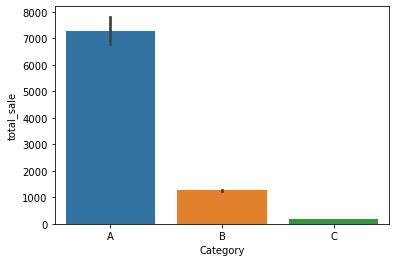

In [16]:
sns.barplot(x='Category',y='total_sale',data=a)

## Multi-criteria ABC analysis on agg level

In [17]:
b = inv.productmix(group_df['Description'],group_df['total_sale'],group_df['total_rev'])
b

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3769,REGENCY CAKESTAND 3 TIER,24139,277656.250,2.292685e-03,0.177816,1.598040e-02,0.015980,A,A,A_A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.010,8.714937e-03,0.018705,1.421875e-02,0.030199,A,A,A_A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,7.692779e-03,0.026398,9.696201e-03,0.039895,A,A,A_A
2860,Manual,9391,151777.670,8.919426e-04,0.424068,8.735504e-03,0.048631,A,A,A_A
2392,JUMBO BAG RED RETROSPOT,74224,134307.440,7.049680e-03,0.048279,7.730012e-03,0.056361,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
894,CAT W SUNGLASSES BLANK CARD,4,0.760,3.799138e-07,0.999966,4.374150e-08,1.000000,C,C,C_C
4046,SET 12 COLOURING PENCILS DOILEY,1,0.650,9.497844e-08,1.000000,3.741049e-08,1.000000,C,C,C_C
3357,PINK HEART CHRISTMAS DECORATION,1,0.380,9.497844e-08,0.999998,2.187075e-08,1.000000,C,C,C_C
2181,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380,1.899569e-07,0.999991,2.187075e-08,1.000000,C,C,C_C


In [18]:
# Product mix
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [19]:
b.product_mix.value_counts()

C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: product_mix, dtype: int64

<AxesSubplot:xlabel='product_mix', ylabel='count'>

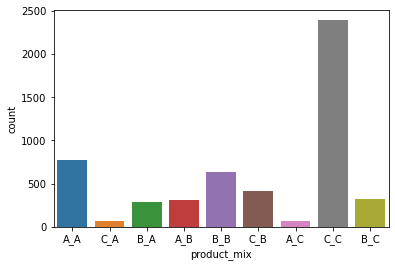

In [20]:
sns.countplot('product_mix',data=b)

<AxesSubplot:xlabel='product_mix', ylabel='sales'>

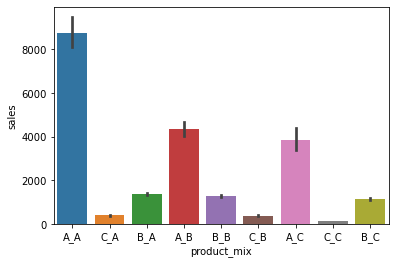

In [21]:
sns.barplot(x='product_mix',y='sales',data=b)

<AxesSubplot:xlabel='product_mix', ylabel='revenue'>

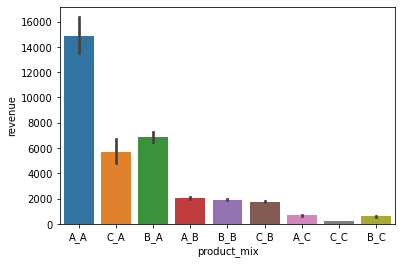

In [22]:
sns.barplot(x='product_mix',y='revenue',data=b)

## Multi-criteria ABC analysis on store/department level

In [23]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [24]:
by_store=retail_clean.groupby(['Description','Country']).agg(total_sales=('Quantity',np.sum),
                                                 total_revenue=('Revenue',np.sum)).reset_index()

In [25]:
mix_country = inv.productmix_storelevel(by_store['Description'],
                             by_store['total_sales'],
                             by_store['total_revenue'],
                             by_store['Country'])

In [26]:
mix_country.columns

Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [27]:
product_mix = mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]

In [28]:
product_mix

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
...,...,...,...
348,West Indies,B_B,4
349,West Indies,B_C,4
350,West Indies,C_A,6
351,West Indies,C_B,3


In [29]:
product_mix[product_mix.storeofsku=='Australia']

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298


## Supplier Segmentation

In [30]:
supplier= pd.read_csv('../input/supplier-scm/supplier_data.csv')

In [31]:
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [32]:
supplier.columns

Index(['supplier', 'product', 'availability', 'no_suppliers', 'standard',
       'price_fluctuation', 'Quantity', 'price'],
      dtype='object')

In [33]:
## Calculate supplier risk index by identifying risk columns
supplier['Risk_index']=supplier['availability']+supplier['no_suppliers']+supplier['standard']+supplier['price_fluctuation']

In [34]:
# less than 1 can be termed as low-risk and more than one as high-risk
supplier.Risk_index.value_counts()

1.0    16
0.5     6
1.5     2
Name: Risk_index, dtype: int64

In [35]:
# Calculate value index
supplier['value_index']= supplier['Quantity']*supplier['price']

In [36]:
supplier.value_index.describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value_index, dtype: float64

### Based on the above statistics we can conclude that the 50 percentile i.e median is at 3M and now we can categorize items below this value as low and above as high.

## Visualizing Krajic

In [37]:
# define a function to map item prioritites on the data

def category(x,y):
    if ((x>=300000) & (y>=1)):
        return 'Strategic'
    if ((x>=300000) & (y<1)):
        return 'Leverage'
    if ((x<300000) & (y>=1)):
        return 'Critical'
    if ((x<300000) & (y<1)):
        return 'Routine'

In [38]:
for i in range(supplier.shape[0]):
    supplier.loc[i,'category']= category(supplier.loc[i,'value_index'],supplier.loc[i,'Risk_index'])

In [39]:
supplier.category.value_counts()

Strategic    16
Leverage      6
Critical      2
Name: category, dtype: int64

<AxesSubplot:xlabel='value_index', ylabel='Risk_index'>

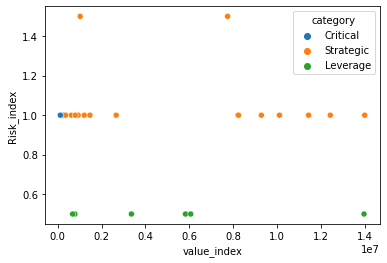

In [40]:
sns.scatterplot(x='value_index', y='Risk_index', data=supplier, hue='category')